In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считаем данные о котировке двух инструментов

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

Содержимое файла x

In [ ]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


Содержимое файла y

In [ ]:
y.head()

,Unnamed: 0,0
0,0,101.159902
1,1,78.442913
2,2,-159.238195
3,3,120.719533
4,4,2.920673


Функция для обработки DataFrame

In [ ]:
def prepare_data(data):
    if isinstance(data, pd.DataFrame):
        return data.squeeze()
    elif isinstance(data, pd.Series):
        return data
    else:
        raise ValueError("Неподдерживаемый тип данных")

Перезамисываем переменные, чтобы получить нужный столбец данных

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']


x_1 = prepare_data(pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0))
y_1 = prepare_data(pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0))

In [ ]:
x_1

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214
5,-0.611756
6,0.319039
7,-0.761207
8,0.582815
9,-1.099891


In [ ]:
x

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214
5,-0.611756
6,0.319039
7,-0.761207
8,0.582815
9,-1.099891


Линейная зависимость одной переменной от другой

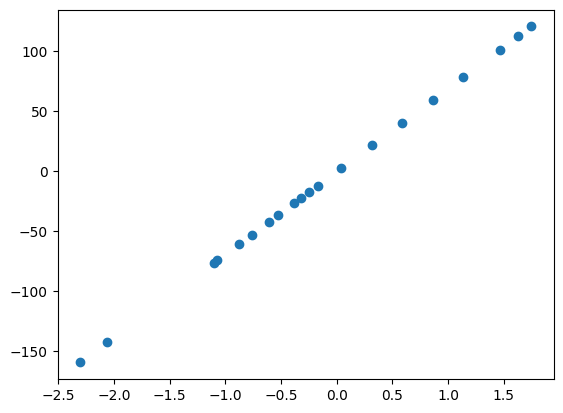

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

Модель парной линейной регрессии

In [ ]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    """
    Метод возвращет теоритическое значение выходной переменной
    """
    def predict(self, X):
        return self.b0 + self.b1 * X

    """
    Функция ошибок - среднеквадратическое отклонение
    """
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))


    """
    Метод градиентного спуска
    """
    def fit(self, X, Y, alpha=0.001, min_error_change=1e-6, max_steps=5000):
        steps, errors = [], []
        step = 0
        previous_error = None
        while True:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            current_error = self.error(X, Y)
            steps.append(step)
            errors.append(current_error)

            if previous_error is not None and abs(previous_error - current_error) < min_error_change:
                break
            previous_error = current_error

            step += 1
            if step >= max_steps:
                break

        return steps, errors

Градиентный спуск

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.03937321303112907


График регрессии

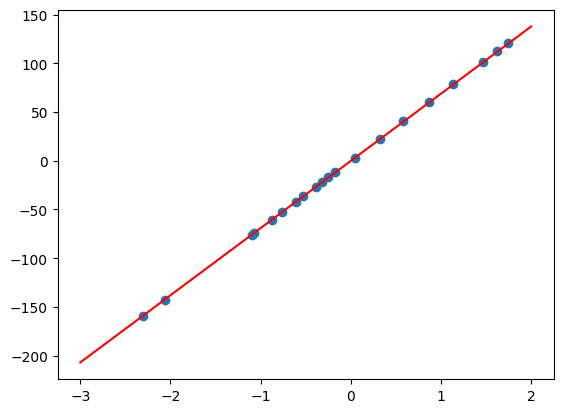

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

График изменения ошибки регресии

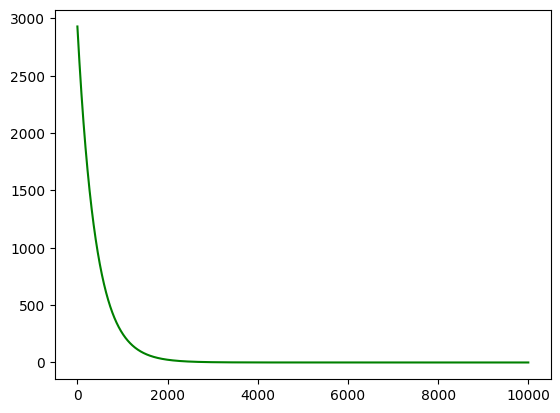

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Самостоятельное выполнение

In [ ]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, initial_alpha=1.0, min_error_change=1e-6, max_restarts=5, max_steps=5000):
        steps, errors = [], []
        restarts = 0
        best_b0, best_b1 = self.b0, self.b1
        best_error = self.error(X, Y)
        alpha = initial_alpha

        while restarts <= max_restarts:
            current_b0, current_b1 = self.b0, self.b1
            current_error = self.error(X, Y)

            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(X, Y)

            if new_error > current_error:
                print(f"Ошибка увеличилась с {current_error:.6f} до {new_error:.6f}, уменьшаем скорость обучения.")
                alpha /= 2
                self.b0, self.b1 = current_b0, current_b1
                restarts += 1
                continue

            if abs(new_error - current_error) < min_error_change:
                print(f"Ошибка уменьшилась незначительно ({abs(new_error - current_error):.6f}), уменьшаем скорость обучения.")
                alpha /= 2
                self.b0, self.b1 = current_b0, current_b1
                restarts += 1
                continue

            print(f"Ошибка уменьшилась с {current_error:.6f} до {new_error:.6f}, продолжаем оптимизацию.")
            steps.append(len(steps))
            errors.append(new_error)

            best_b0, best_b1 = self.b0, self.b1
            best_error = new_error

            if len(steps) >= max_steps:
                break

        self.b0, self.b1 = best_b0, best_b1
        return steps, errors

    def plot_regression(self, X, Y, scale=True, title="Regression Plot"):
        X_plot = np.linspace(np.min(X), np.max(X), 100)
        Y_plot = self.predict(X_plot)

        plt.figure(figsize=(10, 6))
        plt.scatter(X, Y)
        plt.plot(X_plot, Y_plot, 'r')
        plt.title(title)
        plt.grid(True)
        plt.show()

    def plot_errors(self, steps, errors, title="Error Convergence Plot"):
        plt.figure(figsize=(10, 6))
        plt.plot(steps, errors, 'g')
        plt.title(title)
        plt.grid(True)
        plt.show()

In [ ]:
model = Model()

steps, errors = model.fit(x, y)
J = model.error(x, y)
print("error after gradient descent:", J)

Ошибка уменьшилась с 2937.644610 до 213.780043, продолжаем оптимизацию.
Ошибка уменьшилась с 213.780043 до 17.725987, продолжаем оптимизацию.
Ошибка уменьшилась с 17.725987 до 1.479212, продолжаем оптимизацию.
Ошибка уменьшилась с 1.479212 до 0.123474, продолжаем оптимизацию.
Ошибка уменьшилась с 0.123474 до 0.010307, продолжаем оптимизацию.
Ошибка уменьшилась с 0.010307 до 0.000860, продолжаем оптимизацию.
Ошибка уменьшилась с 0.000860 до 0.000072, продолжаем оптимизацию.
Ошибка уменьшилась с 0.000072 до 0.000006, продолжаем оптимизацию.
Ошибка уменьшилась с 0.000006 до 0.000001, продолжаем оптимизацию.
Ошибка уменьшилась незначительно (0.000000), уменьшаем скорость обучения.
Ошибка уменьшилась незначительно (0.000000), уменьшаем скорость обучения.
Ошибка уменьшилась незначительно (0.000000), уменьшаем скорость обучения.
Ошибка уменьшилась незначительно (0.000000), уменьшаем скорость обучения.
Ошибка уменьшилась незначительно (0.000000), уменьшаем скорость обучения.
Ошибка уменьшилась

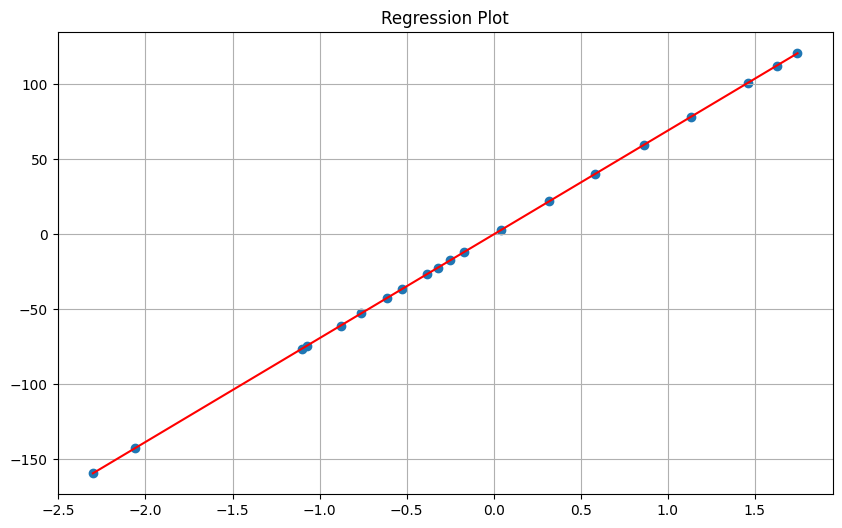

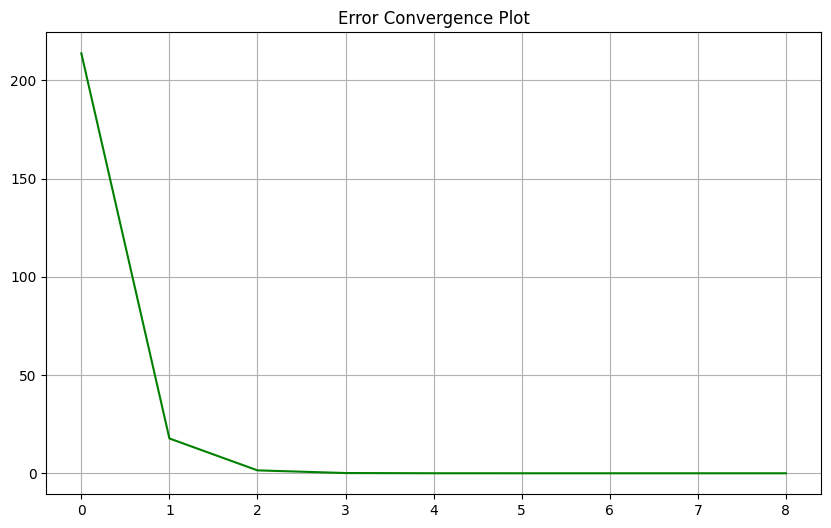

In [ ]:
model.plot_regression(x, y)
model.plot_errors(steps, errors)